In [11]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from PIL import Image

In [12]:
params = []
with open('params.txt', 'r') as file:
    for line in file.readlines():
      parameter = line.strip().split(",")
      parameter = [float(p) for p in parameter if p!='']
      params.append(parameter)
means = np.array(params[0])
stds = np.array(params[1])
W = np.array(params[2])
b = np.array(params[-1][0])

In [13]:
def standardization(x, mean, std):
  mean = mean[:-1]
  std = std[:-1]
  return (x - mean) / std

def destandardization(y, mean, std):
  mean = mean[-1]
  std = std[-1]
  return y*std + mean

def predict(x, W, b):
  y = x.dot(W) + b
  return y

In [14]:
def checkPrice(price):
    if price > 1000000:
        image_path = "image.jpg"
        image = Image.open(image_path)
        display(image)

In [15]:
ilce_label = {'Beylikdüzü': 3,    'Esenyurt': 5,    'Kadıköy': 8,    'Bakırköy': 1,    'Fatih': 7,
    'Kartal': 9,    'Zeytinburnu': 16,    'Kağıthane': 10,    'Bağcılar': 2,    'Tuzla': 15,
    'Sultanbeyli': 14,    'Eyüpsultan': 6,    'Ümraniye': 17,    'Şişli': 18,    'Büyükçekmece': 4,
    'Maltepe': 11,    'Ataşehir': 0,    'Silivri': 13,    'Sarıyer': 12}

isinma_label = {"Kombi (Doğalgaz)":6,      "Merkezi (Pay Ölçer)":5 ,        "Merkezi":4,
                "Yerden Isıtma":3,        "Doğalgaz Sobası":2,             "Kat Kaloriferi":1,
                "Kombi (Elektrik)":0}

var_yok_label = {"Var":1, "Yok":0}
evet_hayır_label = {"Evet":1, "Hayır":0}
kullanım_label = {"Boş":0, "Kiracılı":2, "Mülk Sahibi":1}
kimden_label = {"Emlak Ofisinden":2, "Sahibinden":1, "İnşaat Firmasından":0}

bina_yaşı_label = {'0': 0,    '1': 1,    '2': 2,    '3': 3,    '4': 4,
    '5-10 arası': 5,    '11-15 arası': 11,    '16-20 arası': 16,
    '21-25 arası': 21,    '26-30 arası': 26,    '31 ve üzeri': 31}


In [16]:
ilceler = ilce_label.keys()
isinma = isinma_label.keys()
var_yok = var_yok_label.keys()
evet_hayır = evet_hayır_label.keys()
kullanım = kullanım_label.keys()
kim = kimden_label.keys()
bina_yaşı = bina_yaşı_label.keys()

In [17]:
ilce = widgets.Dropdown(options=ilceler, description='İlçe:')
metrekare = widgets.FloatText(description='Metrekare (Net):')
oda_sayisi = widgets.FloatText(description='Oda Sayısı:')
bulundugu_kat = widgets.FloatText(description='Bulunduğu Kat:')
kat_sayisi = widgets.FloatText(description='Kat Sayısı:')
balkon_durumu = isinma_sinifi = widgets.Dropdown(options=var_yok, description='Balkon:')
esya_durumu = isinma_sinifi = widgets.Dropdown(options=evet_hayır, description='Eşyalı:')
kullanim_durumu = widgets.Dropdown(options=kullanım, description='Kullanım Durumu:')
sitede_olma_durumu = widgets.Dropdown(options=evet_hayır, description='Sitede:')
kimden = widgets.Dropdown(options=kim, description='Kimden:')
salon_sayisi = widgets.FloatText(description='Salon Sayısı:')
bina_yasi_sinifi = widgets.Dropdown(options=bina_yaşı, description='Bina Yaşı:')
isinma_sinifi = widgets.Dropdown(options=isinma, description='Isınma Şekli:')

In [18]:
inputs = [
    ilce,
    metrekare,
    oda_sayisi,
    bulundugu_kat,
    kat_sayisi,
    balkon_durumu,
    esya_durumu,
    kullanim_durumu,
    sitede_olma_durumu,
    kimden,
    salon_sayisi,
    bina_yasi_sinifi,
    isinma_sinifi
]

In [19]:
def on_button_clicked(button):
    ilce_val = ilce_label[ilce.value]
    metrekare_val = metrekare.value
    oda_sayisi_val = oda_sayisi.value
    bulundugu_kat_val = bulundugu_kat.value
    kat_sayisi_val = kat_sayisi.value
    balkon_durumu_val = var_yok_label[balkon_durumu.value]
    esya_durumu_val = evet_hayır_label[esya_durumu.value]
    kullanim_durumu_val = kullanım_label[kullanim_durumu.value]
    sitede_olma_durumu_val = evet_hayır_label[sitede_olma_durumu.value]
    kimden_val = kimden_label[kimden.value]
    salon_sayisi_val = salon_sayisi.value
    bina_yasi_sinifi_val = bina_yaşı_label[bina_yasi_sinifi.value]
    isinma_sinifi_val = isinma_label[isinma_sinifi.value]
    
    x = [ilce_val,
        metrekare_val,
        oda_sayisi_val,
        bulundugu_kat_val,
        kat_sayisi_val,
        balkon_durumu_val,
        esya_durumu_val,
        kullanim_durumu_val,
        sitede_olma_durumu_val,
        kimden_val,
        salon_sayisi_val,
        bina_yasi_sinifi_val,
        isinma_sinifi_val]
    
    x = np.array(x)
    x = standardization(x, means, stds)
    y_pred = predict(x, W, b)
    y_pred = destandardization(y_pred, means, stds)
    y_str = str(int(y_pred))
    formatted_y = ""
    for i in range(len(y_str)):
        if i > 0 and (len(y_str) - i) % 3 == 0:
            formatted_y += "."
        formatted_y += y_str[i]
    input_box.close()
    submit_button.close()
    print(f"\nEvin muhtemel fiyatı: {formatted_y} TL\n\n\n\n")
    checkPrice(int(y_pred))


Button(description='GÖNDER', style=ButtonStyle())


Evin muhtemel fiyatı: 5.092.906 TL






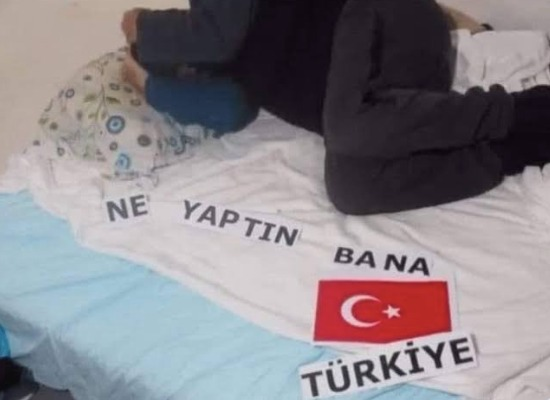


Evin muhtemel fiyatı: 3.999.721 TL






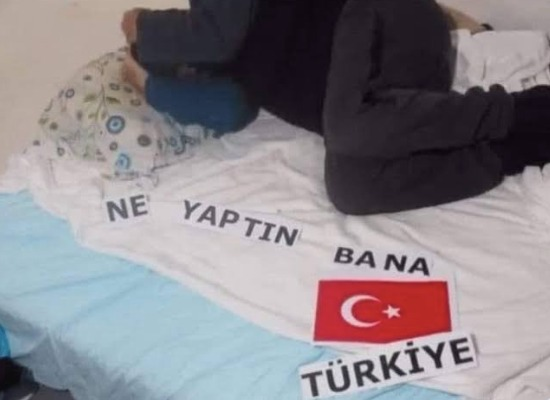

In [21]:
input_box = widgets.VBox(inputs)
display(input_box)

submit_button = widgets.Button(description='GÖNDER')

submit_button.on_click(on_button_clicked)
display(submit_button)